# 4. Handling missing data
- Filtering out missing data
- Filling in missing data

In [10]:
from IPython.display import Image

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

# 4. Handling missing data
    누락된 데이터 처리하기

- pandas의 설계 목표 중 하나는 누락 데이터를 가능한 한 쉽게 처리할 수 있도록 하는 것이다.
- pandas는 누락된 데이터를 실수든 아니든 모두 NaN(Not a Number)으로 취급한다.
- 그래서 누락된 값을 쉽게 찾을 수 있다.

In [11]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [12]:
string_data.isnull() # NaN값이 있으면 True

0    False
1    False
2     True
3    False
dtype: bool

In [13]:
string_data[0] = None
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [14]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

# NA 처리 메소드
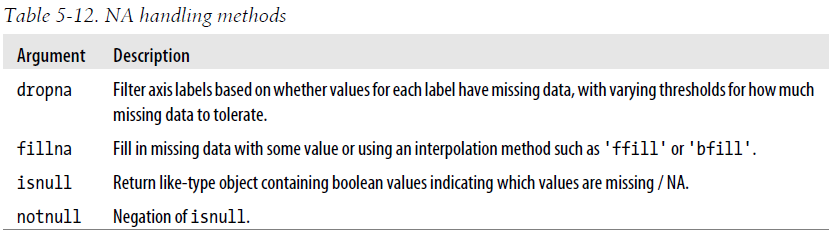

# Filtering out missing data 
    누락된 데이터 골라내기

- Series에 대해 dropna 메소드를 적용하면, 실제 데이터가 들어있는 색인값과 Series값으로 반환한다.

In [15]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna() # na값은 전부 없애줌(원본은 변하지 않음)

0    1.0
2    3.5
4    7.0
dtype: float64

In [16]:
data.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [17]:
data[data.notnull()] # 원본은 변하지 않음, 

0    1.0
2    3.5
4    7.0
dtype: float64

In [18]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [19]:
cleaned = data.dropna()# NaN값이 있는 row 전부 삭제
cleaned

,0,1,2
0,1.0,6.5,3.0


In [20]:
# "모든 값"이 NA인 로우만 제외
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [21]:
data[4] = NA # 없으면 컬럼 4 생성 후 NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [22]:
data.dropna(axis=1, how='all') # column에서 모든 값이 NaN인 컬럼 삭제

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [21]:
df = DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,1.182183,-0.569001,2.364764
1,0.780129,0.184204,1.448747
2,0.905975,0.893817,0.325909
3,0.955768,-0.571666,-0.845549
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


In [22]:
df.iloc[:4, 1] = NA 
df.iloc[:2, 2] = NA
df

,0,1,2
0,1.182183,NaN,NaN
1,0.780129,NaN,NaN
2,0.905975,NaN,0.325909
3,0.955768,NaN,-0.845549
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


In [24]:
# thresh : 몇 개 이상의 값이 들어있는 로우만 살펴보고 싶을때 넣는 인자 값
df.dropna(thresh=3) # 정상값이 3개 미만이면 삭제

,0,1,2
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


In [23]:
df.dropna(thresh=2) # 정상값이 2개 미만이면 삭제

,0,1,2
2,0.905975,NaN,0.325909
3,0.955768,NaN,-0.845549
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


In [25]:
df.dropna(thresh=1) # 정상값이 1개 미만이면 삭제

,0,1,2
0,1.182183,NaN,NaN
1,0.780129,NaN,NaN
2,0.905975,NaN,0.325909
3,0.955768,NaN,-0.845549
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


# Filling in missing data 

In [26]:
df

,0,1,2
0,1.182183,NaN,NaN
1,0.780129,NaN,NaN
2,0.905975,NaN,0.325909
3,0.955768,NaN,-0.845549
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


In [27]:
df.fillna(0) # NaN값을 0으로 변경

,0,1,2
0,1.182183,0.000000,0.000000
1,0.780129,0.000000,0.000000
2,0.905975,0.000000,0.325909
3,0.955768,0.000000,-0.845549
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


In [29]:
# fillna에 사전값을 넣어서 각 칼럼마다 다른값을 채워넣을수도 있다.
df.fillna({1: 0.5, 2: -1}) # 컬럼기준으로 값 할당시킬 수도 있음

,0,1,2
0,1.182183,0.500000,-1.000000
1,0.780129,0.500000,-1.000000
2,0.905975,0.500000,0.325909
3,0.955768,0.500000,-0.845549
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


In [30]:
# fillna는 값을 채워 넣은 객체의 참조를 반환한다.
df = df.fillna(0, inplace=True) # inplace를 하게 되면 원본에도 영향을 미침
df 

,0,1,2
0,1.182183,0.000000,0.000000
1,0.780129,0.000000,0.000000
2,0.905975,0.000000,0.325909
3,0.955768,0.000000,-0.845549
4,1.236867,-0.102846,2.061645
5,0.081917,2.414371,0.292528
6,0.251952,2.766636,0.308336


In [31]:
df = DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA # 2행부터 끝까지, 1열은 NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,0.661805,-1.564994,-1.117586
1,1.547185,1.233544,-0.774847
2,-2.246556,NaN,0.301941
3,-0.185440,NaN,-0.292733
4,0.958319,NaN,NaN
5,-0.110747,NaN,NaN


In [32]:
df.fillna(method='ffill') # NaN값을 NaN값 마지막 정상치의 값으로 입력

,0,1,2
0,0.661805,-1.564994,-1.117586
1,1.547185,1.233544,-0.774847
2,-2.246556,1.233544,0.301941
3,-0.185440,1.233544,-0.292733
4,0.958319,1.233544,-0.292733
5,-0.110747,1.233544,-0.292733


In [33]:
df.fillna(method='ffill', limit=2) # 앞의 값을 2개까지만 이식할 수 있도록

,0,1,2
0,0.661805,-1.564994,-1.117586
1,1.547185,1.233544,-0.774847
2,-2.246556,1.233544,0.301941
3,-0.185440,1.233544,-0.292733
4,0.958319,NaN,-0.292733
5,-0.110747,NaN,-0.292733


In [34]:
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean()) # NaN값을 평균으로 채워줌

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

# fillna 함수 인자
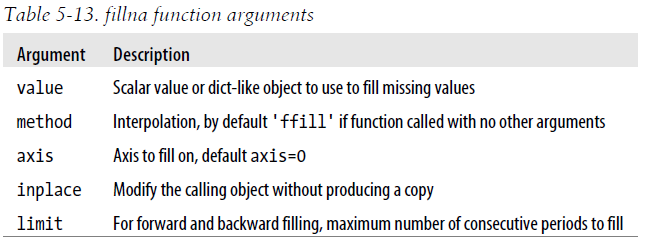